# <center> Jupyter Notebooks in Action </center>
<center> Christian Ritter </center>
<center> critter@uvic.ca </center>

<center> Notebooks @ https://github.com/chritter/Talks/blob/master/VicPiMakers </center> 


## Setting up Jupyter

* Notebook server start with `jupyter notebook`
* Jupyter Notebook App starts dashboard
* Port of choice 
* separate configuration files
* GUI through browser
* Notebooks are in JSON format and human readable (metadata editable)
* Configuration: jupyter_notebook_config.py
* Support:
    * Chrome
    * Safari
    * Firefox


In [2]:
%connect_info

{
  "shell_port": 57169,
  "iopub_port": 57170,
  "stdin_port": 57171,
  "control_port": 57172,
  "hb_port": 57173,
  "ip": "127.0.0.1",
  "key": "7129c1b9-3861abc347f06587e0025eef",
  "transport": "tcp",
  "signature_scheme": "hmac-sha256",
  "kernel_name": ""
}

Paste the above JSON into a file, and connect with:
    $> jupyter <app> --existing <file>
or, if you are local, you can connect with just:
    $> jupyter <app> --existing kernel-2b1ffd81-ea8d-4ffa-b20e-b1bb863c5d21.json
or even just:
    $> jupyter <app> --existing
if this is the most recent Jupyter kernel you have started.


## Standard capabilities

### Basic Python

* Only execution of one cell at a time
* Serves as analysis, analytics platform but not for software development
* Basic cell types are code cells and markdown cells 

In [3]:
a = 3
print(a)

3


Standard markdown Markdown
* Test
`Test`
***Test***

and Latex

$\int_0^3 x^2 dx$

In [4]:
import pandas as pd
pd.DataFrame({'aa':[1,2,3],'bb':[2,3,4]})

,aa,bb
0,1,2
1,2,3
2,3,4


### Plotting

* Supports standard plotting capabilities of Python
* Supports different backends such as the interactive `nbagg` backend

In [5]:
import matplotlib.pyplot as plt
%matplotlib nbagg

<IPython.core.display.Javascript object>


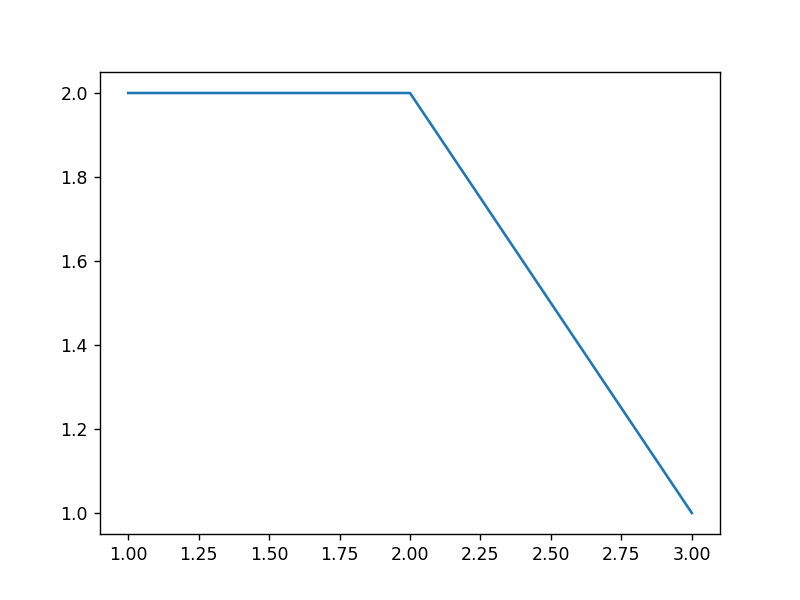

In [6]:
plt.plot([1,2,3],[2,2,1])
plt.savefig('line_plot.png')

rendering images
![title](line_plot.png)

### Converting to other formats

* Use GUI `File` tab
* Command line via `nbconvert`

In [8]:
%%bash
jupyter nbconvert CapabilityDemos.ipynb --to python  #--to pdf

This application is used to convert notebook files (*.ipynb) to various other
formats.


Options
-------

Arguments that take values are actually convenience aliases to full
Configurables, whose aliases are listed on the help line. For more information
on full configurables, see '--help-all'.

--debug
    set log level to logging.DEBUG (maximize logging output)
--generate-config
    generate default config file
-y
    Answer yes to any questions instead of prompting.
--execute
    Execute the notebook prior to export.
--allow-errors
    Continue notebook execution even if one of the cells throws an error and include the error message in the cell output (the default behaviour is to abort conversion). This flag is only relevant if '--execute' was specified, too.
--stdin
    read a single notebook file from stdin. Write the resulting notebook with default basename 'notebook.*'
--stdout
    Write notebook output to stdout instead of files.
--inplace
    Run nbconvert in place, overwriting 

[NbConvertApp] WARNING | pattern 'CapabilityDemos.ipynb' matched no files


### Processing kernels

* A variety of kernels allow to run Python2/3, Bash, R, Scala: https://github.com/jupyter/jupyter/wiki/Jupyter-kernels
* `Kernel` menu

* [RNotebook.ipynb](RNotebook.ipynb)

### Shell commands

In [9]:
!ls -ltr

total 2216
-rw-r--r--  1 christian  staff      49 24 Mar 08:32 utils.py
-rw-r--r--  1 christian  staff   50147 24 Mar 08:58 RNotebook.ipynb
-rw-r--r--  1 christian  staff    4160 24 Mar 10:18 CapabilityDemos.py
-rw-r--r--  1 christian  staff       4 24 Mar 10:46 test.txt
-rw-r--r--  1 christian  staff       0 24 Mar 10:47 untitled.txt
-rw-r--r--  1 christian  staff    2305 24 Mar 11:02 II. OtherApplications.ipynb
-rw-r--r--  1 christian  staff    7695 29 Mar 09:32 III. JupyterLab.ipynb
-rw-r--r--  1 christian  staff  149353 29 Mar 09:33 I. CapabilityDemos.ipynb
-rw-r--r--@ 1 christian  staff  368032 29 Mar 09:34 I.+CapabilityDemos (1).html
-rw-r--r--@ 1 christian  staff  252674 29 Mar 09:34 II.+OtherApplications.html
-rw-r--r--@ 1 christian  staff  257636 29 Mar 09:35 III.+JupyterLab.html
-rw-r--r--  1 christian  staff    1262 29 Mar 09:36 TestNotebookDependency.ipynb
-rw-r--r--  1 christian  staff   13215 29 Mar 09:36 line_plot.png


### Notebook magic

In [10]:
%%
#Other magic commands available:
a = [i for i in range(100000000)]

ERROR:root:Cell magic `%%` not found.


Default kernel for notebook plus kernel can be switched via magic commands

### Executing external code

In [11]:
%run utils.py

In [12]:
!cat utils.py

def test_func():
    print('executed test_func')


In [13]:
test_func()

executed test_func


### Security

* Trusted notebooks: signature in notebook metadata ensures safe execution

    `jupyter trust mynotebook.ipynb`

* Password protection through jupyter_notebook_config.py

In [14]:
#from notebook.auth import passwd
#passwd()

### Workflow

* Create notebook/project (github?)
* Create reproducable analysis (beware of random numbers)
* Add layouts, organization
* Publish/Share

### Deploying Notebooks

* Viewer for notebooks @ https://nbviewer.jupyter.org/
* Run your own Jupyter server in the cloud. 
* Rendering on GitHub

### Presenting results

* https://damianavila.github.io/RISE/
* https://github.com/Anaconda-Platform/nbpresent#install

### Reading from other Jupyter notebooks

Disadvantage: Notebooks are typically separate workflows.

In [15]:
import json

In [16]:
f1 = open('TestNotebookDependency.ipynb')
lines=f1.readlines()
f1.close()

str_dum = ''
for l in lines:
    str_dum +=l

In [17]:
d = json.loads(str_dum)

In [18]:
d['cells']

[{'cell_type': 'markdown',
  'metadata': {},
  'source': ['# Test for I. CapabilityDemos.ipynb']},
 {'cell_type': 'code',
  'execution_count': 5,
  'metadata': {'collapsed': True},
  'outputs': [],
  'source': ['time = 3. #s\n', 'distance = 5. #m']},
 {'cell_type': 'code',
  'execution_count': 6,
  'metadata': {},
  'outputs': [{'data': {'text/plain': ['1.6666666666666667']},
    'execution_count': 6,
    'metadata': {},
    'output_type': 'execute_result'}],
  'source': ['velocity = distance/time #m/s\n', 'velocity']},
 {'cell_type': 'code',
  'execution_count': None,
  'metadata': {'collapsed': True},
  'outputs': [],
  'source': []}]

In [19]:
for cell in d['cells']:
    if len(cell['source'])>0:
        if 'velocity' in cell['source'][-1]:
            print(cell['outputs'][0]['data']['text/plain'])

['1.6666666666666667']


### Youtube

In [20]:
from IPython.display import YouTubeVideo

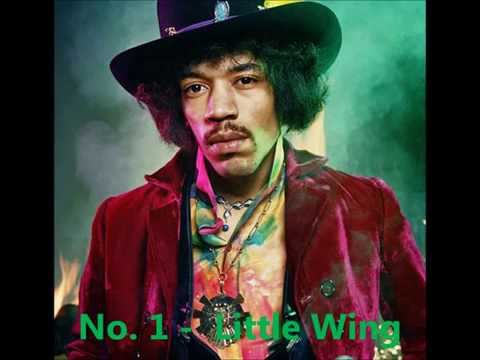

In [21]:
#https://www.youtube.com/watch?v=Iuj9vLOvVJo
YouTubeVideo("Iuj9vLOvVJo")

### Widgets

* Interactive widgets (buttons, levels etc.) at http://jupyter.org/widgets
* Easy integration with existing code, e.g. functions

In [22]:
from ipywidgets import interactive
def myfunction(x):
    return x
w = interactive(myfunction, x= "Hello World ");
from IPython.display import display
display(w)

interactive(children=(Text(value='Hello World ', description='x'), Output()), _dom_classes=('widget-interact',))

* Building complex widgets: http://nugrid.github.io/NuPyCEE/webinterface.html

### Notebook Extensions
* Community adds new extensions
* Many extensions available but beware of compatibility